In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import os
import glob
import cv2
import tensorflow as tf
from keras import layers
from keras.layers import Dropout , Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.initializers import glorot_uniform
from sklearn.model_selection import train_test_split
import keras.backend as K
from sklearn.utils import shuffle

C:\Users\LENOVO\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
X_para = []
Y_para = []
myfiles = glob.glob("data/Parasites/*.jpg")
for file in myfiles:
    kernel = np.array([[0,-1,0],[-1,6,-1],[0,-1,0]])
    img = cv2.filter2D( cv2.resize(cv2.imread(file) , (120,120)) , -1 , kernel)
    image_yuv = cv2.cvtColor(img ,cv2.COLOR_BGR2YUV )
    image_yuv[: ,: , 0] = cv2.equalizeHist(image_yuv[:,:,0])
    image = cv2.cvtColor(image_yuv , cv2.COLOR_YUV2RGB)
    X_para.append(image)
    Y_para.append(1)

In [3]:
X_un , Y_un = [],[]
unfiles = glob.glob("data/Unparasites/*.jpg")
for file in unfiles:
    kernel = np.array([[0,-1,0],[-1,7,-1],[0,-1,0]])
    img = cv2.filter2D( cv2.resize(cv2.imread(file) , (120,120)) , -1 , kernel)
    X_un.append(img)
    Y_un.append(0)

In [4]:
X = X_para + X_un
Y = Y_para + Y_un
X,Y = shuffle = (X,Y)
X,Y = shuffle = (X,Y)
X,Y = shuffle = (X,Y)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3 , random_state =42)
X = np.array(X)

In [27]:
X.shape

(1191, 120, 120, 3)

In [19]:
inp = Input(shape = (120 , 120 , 3))
x = Conv2D(filters = 16 , kernel_size = (3,3) , strides = (1,1) , padding = "valid" , kernel_initializer=glorot_uniform(seed = 2))(inp)
x = Activation("relu")(x)
x = Dropout(0.2)(x)
x = Conv2D(filters = 32 , kernel_size = (4,4) , strides = (2,2) , padding = "valid" , kernel_initializer=glorot_uniform(seed = 2))(x)
x = Activation("relu")(x)
x = MaxPooling2D(pool_size = (2,2) , strides = (2,2) , padding = "valid")(x)
x = Dropout(0.2)(x)
x = Conv2D(filters = 64 , kernel_size = (3,3) , strides = (2,2) , padding = "valid" , kernel_initializer = glorot_uniform(seed = 2))(x)
x = Activation("relu")(x)
x = Dropout(0.2)(x)
x = Conv2D(filters = 128 , kernel_size = (3,3) , strides = (1,1) , padding = "valid" , kernel_initializer = glorot_uniform())(x)
x = Activation("relu")(x)
x = MaxPooling2D(pool_size = (2,2) , strides = (2,2) , padding = "valid")(x)
x = Dropout(0.2)(x)
x = Conv2D(filters = 256 , kernel_size = (2,2) , strides = (2,2) , padding = "valid" , kernel_initializer = glorot_uniform())(x)
x = Activation("relu")(x)
x = AveragePooling2D(pool_size = (3,3) , strides = (1,1) , padding = "valid")(x)
x = Dropout(0.2)(x)
x = Flatten()(x)
x = Dense(120)(x)
x = Activation("relu")(x)
x = Dropout(0.2)(x)
x = Dense(60)(x)
x = Activation("relu")(x)
x = Dropout(0.2)(x)
x = Dense(10)(x)
x = Activation("relu")(x)
x = Dropout(0.)(x)
x = Dense(1)(x)
output = Activation("sigmoid")(x)
model  = Model(inputs =inp , outputs = output )

In [39]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 120, 120, 3)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 118, 118, 16)      448       
_________________________________________________________________
activation_24 (Activation)   (None, 118, 118, 16)      0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 118, 118, 16)      0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 58, 58, 32)        8224      
_________________________________________________________________
activation_25 (Activation)   (None, 58, 58, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 29, 29, 32)        0         
__________

In [23]:
model.compile(loss = "binary_crossentropy" , optimizer = "adam" , metrics = ["accuracy"])
history = model.fit(np.array(X_train) ,np.array(Y_train) , batch_size=64, epochs = 15 ,validation_split = 0.3 )

Train on 583 samples, validate on 250 samples
Epoch 1/13
583/583 [==============================] - 4s 7ms/step - loss: 8.3028e-05 - acc: 1.0000 - val_loss: 1.0200e-07 - val_acc: 1.0000
Epoch 2/13
583/583 [==============================] - 3s 5ms/step - loss: 0.2656 - acc: 0.9674 - val_loss: 0.0160 - val_acc: 0.9880
Epoch 3/13
583/583 [==============================] - 3s 5ms/step - loss: 0.0180 - acc: 0.9983 - val_loss: 3.8817e-04 - val_acc: 1.0000
Epoch 4/13
583/583 [==============================] - 3s 5ms/step - loss: 0.0196 - acc: 0.9983 - val_loss: 3.9265e-05 - val_acc: 1.0000
Epoch 5/13
583/583 [==============================] - 3s 5ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 1.9224e-06 - val_acc: 1.0000
Epoch 6/13
583/583 [==============================] - 3s 5ms/step - loss: 0.0019 - acc: 0.9983 - val_loss: 3.1276e-07 - val_acc: 1.0000
Epoch 7/13
583/583 [==============================] - 3s 5ms/step - loss: 8.8853e-06 - acc: 1.0000 - val_loss: 1.6494e-07 - val_acc: 1.000

In [32]:
y_pre = model.predict(np.array(X_test))
Y_test = np.array(Y_test)
fil = y_pre > 0.8
y_pre[fil] = 1
fil = y_pre < 0.8
y_pre[fil] = 0
np.sum(Y_test == y_pre)/1191

82.62300587741393

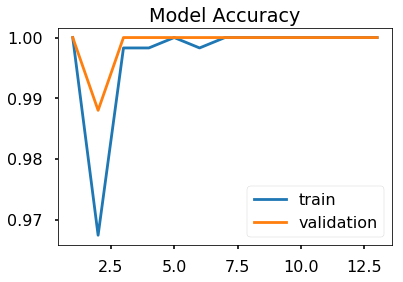

In [41]:
import seaborn as sns
sns.set_context('poster')
epochs = 13

plt.title("Model Accuracy")
plt.plot(range(1,epochs+1), history.history['acc'], label='train')
plt.plot(range(1,epochs+1), history.history['val_acc'], label='validation')
plt.legend();

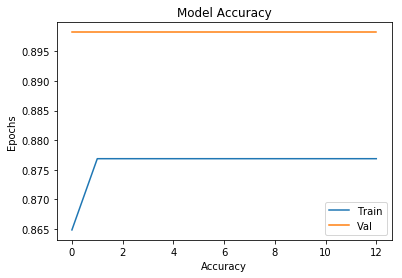

In [10]:
plt.plot(history.history['acc'])
plt.plot(history.history["val_acc"])
plt.title("Model Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Epochs")
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

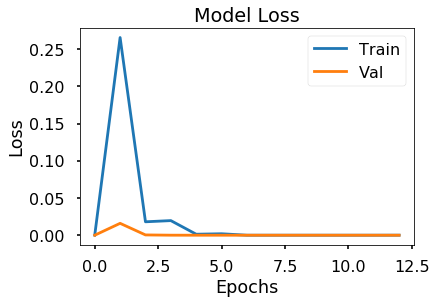

In [40]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()